In [ ]:
#Importing gym environment
! pip install gym

In [ ]:
#Importing all the required libraries
import numpy as np
import matplotlib.pyplot as plt
import gym
from gym import spaces
import time

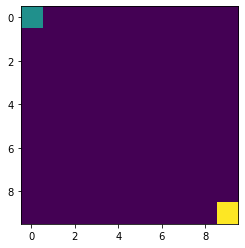

In [ ]:
#Defining a 10*10 grid along with start and terminal positions
grid  =  np.zeros((10,10))
start_pos = [0,0]
terminal_pos = [9, 9]
grid[tuple(start_pos)] = 2
grid[tuple(terminal_pos)] = 4
agent_pos = [0,0]
plt.imshow(grid)




In [ ]:
class Gridworld (gym.Env):
  def __init__(self):
    self.action_space = spaces.Discrete(4)
    self.observation_space = spaces.Discrete(100)
    self.max_timesteps = 15

  def step(self, action):
  #Defining all the possible actions
    if action == 0:
      self.agent_pos[0] += 1
    if action == 1:
      self.agent_pos[0] -= 1
    if action == 2:
      self.agent_pos[1] += 1
    if action == 3:
      self.agent_pos[1] -= 1
    if action == 4:
      self.agent_pos[1] += 1 
      self.agent_pos[0] += 1
    self.agent_pos = np.clip(self.agent_pos, 0, 9) 
    self.state = np.zeros((10,10))
    #Defining the start and end positions for agent along with reward and penalty positions
    #Assigning colors to agent position, terminal position, rewards and penalties
    self.state[tuple(self.agent_pos)] = 1
    self.state[tuple(self.terminal_pos)] = 0.5 
    self.reward_pos_1 = [9,4]
    self.reward_pos_2 = [4,4]
    self.reward_pos_3 = [6,8]
    self.state[9,4] = 0.3
    self.state[4,4] = 0.8
    self.state[6,8] = 0.4  
    #Defining the reward values
    if (self.agent_pos == [6,8]).all():
      self.reward += 5
    if (self.agent_pos == [9,4]).all():
      self.reward += 5
    if (self.agent_pos == [4,4]).all():
      self.reward += 2
    #Defining and assigning terminal state reward 
    if (self.agent_pos == self.terminal_pos).all():
      self.reward += 10
    self.timesteps += 1

    return self.reward, self.agent_pos

  def render(self):
    plt.imshow(self.state)
  def reset(self):
    self.timesteps = 0
    self.agent_pos = [0, 0]
    self.terminal_pos = [9,9]
    self.reward_pos_3 = [6,8]
    self.reward_pos_1 = [9,4]
    self.reward_pos_2 = [4,4]
    self.state = np.zeros((10,10))
    self.state[tuple(self.agent_pos)] = 1
    self.state[tuple(self.terminal_pos)] = 0.5
    observation = self.state.flatten()
    self.reward = 0
    return observation



""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

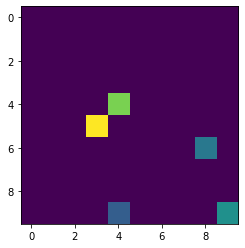

<IPython.core.display.Javascript object>

KeyboardInterrupt: ignored

In [ ]:
from google.colab import widgets
env = Gridworld()
obs = env.reset()
output_grid = widgets.Grid(1,1)

for i in range(100):
  action = np.random.randint(0,5)
  grid = np.zeros((10,10))
  reward, position  = env.step(action)
  with output_grid.output_to(0,0):
    output_grid.clear_cell()
    env.render()
  time.sleep(0.5)
  if (position == terminal_pos).all():
    break 
print(env.timesteps)
print(reward)